In [43]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem import MACCSkeys
from rdkit.Chem.Draw import IPythonConsole

In [3]:
suppl = Chem.SDMolSupplier("../data/drugbank.sdf")
drugbank = [m for m in suppl if m]

In [7]:
morgan_fps = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) for m in drugbank]

In [9]:
len(morgan_fps), morgan_fps[0:10]

(7110,
  <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x7fd584882210>])

In [12]:
set(morgan_fps[666].GetOnBits()), len(morgan_fps[666].GetOnBits())

({1,
  3,
  13,
  33,
  64,
  80,
  147,
  175,
  283,
  316,
  356,
  371,
  414,
  428,
  457,
  534,
  568,
  625,
  628,
  650,
  656,
  677,
  695,
  726,
  747,
  759,
  764,
  786,
  807,
  833,
  849,
  881,
  893,
  913,
  924,
  952,
  953,
  968,
  1019},
 39)

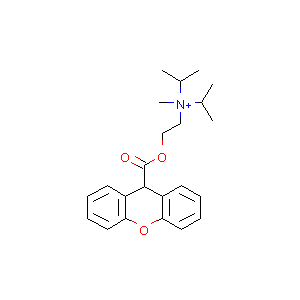

In [14]:
Draw.MolToImage(drugbank[666])

In [16]:
devil_fp = Chem.GetMorganFingerprintAsBitVect(drugbank[666], 2, nBits=512)

In [17]:
set(devil_fp.GetOnBits()), len(devil_fp.GetOnBits())

({1,
  3,
  13,
  22,
  33,
  56,
  64,
  80,
  113,
  116,
  138,
  144,
  147,
  165,
  175,
  183,
  214,
  235,
  247,
  252,
  274,
  283,
  295,
  316,
  321,
  337,
  356,
  369,
  371,
  381,
  401,
  412,
  414,
  428,
  440,
  441,
  456,
  457,
  507},
 39)

In [18]:
devil_fp_10 = Chem.GetMorganFingerprintAsBitVect(drugbank[666], 2, nBits=10)
set(devil_fp_10.GetOnBits()), len(devil_fp_10.GetOnBits())

({0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, 10)

In [19]:
devil_fp_10k = Chem.GetMorganFingerprintAsBitVect(drugbank[666], 2, nBits=9999)
set(devil_fp_10k.GetOnBits()), len(devil_fp_10k.GetOnBits())

({237,
  939,
  963,
  1024,
  1075,
  1202,
  1269,
  1420,
  1768,
  2478,
  2963,
  3112,
  3262,
  3432,
  3808,
  3836,
  4507,
  4779,
  5786,
  5870,
  6059,
  6333,
  6529,
  7021,
  7320,
  7441,
  7885,
  7996,
  8123,
  8150,
  8169,
  8294,
  8411,
  8832,
  9232,
  9236,
  9440,
  9627,
  9803},
 39)

In [20]:
morgan_fps_2_1024 = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) for m in drugbank]
morgan_fps_2_512 = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=512) for m in drugbank]
morgan_fps_2_2048 = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=2048) for m in drugbank]
morgan_fps_3_1024 = [Chem.GetMorganFingerprintAsBitVect(m, 3, nBits=1024) for m in drugbank]
morgan_fps_3_512 = [Chem.GetMorganFingerprintAsBitVect(m, 3, nBits=512) for m in drugbank]
morgan_fps_3_2048 = [Chem.GetMorganFingerprintAsBitVect(m, 3, nBits=2048) for m in drugbank]

In [22]:
def fingerprint_density(fps):
    sum_on_bit_density = sum((len(fp.GetOnBits()) / fp.GetNumBits() for fp in fps))
    average_on_bit_density = sum_on_bit_density / len(fps)
    return average_on_bit_density

In [24]:
densities = [fingerprint_density(fps) for fps in (morgan_fps_2_512, morgan_fps_2_1024, morgan_fps_2_2048,
                                                  morgan_fps_3_512, morgan_fps_3_1024, morgan_fps_3_2048)]

In [25]:
densities

[0.07596557445499297,
 0.038865813994374124,
 0.01966605957718003,
 0.10068345639943742,
 0.05196974441807314,
 0.026418213234001408]

In [28]:
avg_on_bits = [ x * y for x, y in zip(densities, (512, 1024, 2048, 512, 1024, 2048))]
avg_on_bits

[38.8943741209564,
 39.7985935302391,
 40.2760900140647,
 51.54992967651196,
 53.21701828410689,
 54.10450070323488]

In [30]:
drugbank_maccs = [MACCSkeys.GenMACCSKeys(m) for m in drugbank]

In [33]:
fingerprint_density(drugbank_maccs), fingerprint_density(drugbank_maccs)*166

(0.26487447046834517, 43.9691620977453)

In [34]:
morgan_fps_2_166 = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=166) for m in drugbank]

In [35]:
fingerprint_density(morgan_fps_2_166), fingerprint_density(morgan_fps_2_166)*166

(0.21416128649620272, 35.55077355836965)

In [42]:
bitinfo = {}
fp = Chem.GetMorganFingerprintAsBitVect(drugbank[666], 2, nBits=512, bitInfo=bitinfo)
bitinfo

{1: ((4, 0), (5, 0)),
 3: ((15, 1), (16, 1)),
 13: ((12, 1),),
 22: ((14, 1),),
 33: ((7, 0), (8, 0), (9, 0), (10, 0), (11, 0)),
 56: ((14, 2),),
 64: ((23, 1), (25, 1), (24, 1), (26, 1)),
 80: ((6, 0), (12, 0)),
 113: ((3, 2),),
 116: ((7, 1),),
 138: ((2, 0),),
 144: ((1, 0),),
 147: ((0, 1),),
 165: ((17, 2), (18, 2)),
 175: ((23, 2), (25, 2), (24, 2), (26, 2)),
 183: ((0, 0),),
 214: ((19, 1), (20, 1), (21, 1), (22, 1)),
 235: ((13, 1),),
 247: ((1, 2),),
 252: ((0, 2),),
 274: ((1, 1),),
 283: ((8, 1), (9, 1), (10, 1), (11, 1)),
 295: ((14, 0),),
 316: ((13, 2),),
 321: ((6, 2),),
 337: ((19, 0), (20, 0), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0)),
 356: ((15, 0), (16, 0), (17, 0), (18, 0)),
 369: ((17, 1), (18, 1)),
 371: ((19, 2), (20, 2)),
 381: ((2, 1),),
 401: ((6, 1),),
 412: ((3, 1),),
 414: ((3, 0),),
 428: ((12, 2),),
 440: ((4, 2), (5, 2)),
 441: ((15, 2), (16, 2)),
 456: ((4, 1), (5, 1)),
 457: ((21, 2), (22, 2)),
 507: ((13, 0),)}

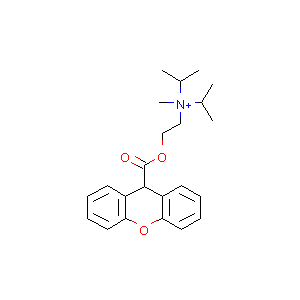

In [38]:
Draw.MolToImage(drugbank[666])

In [39]:
def bit2smiles(mol, bit):
    bitinfo = {}
    Chem.GetMorganFingerprintAsBitVect(mol, 2, nBits=512, bitInfo=bitinfo)
    fragments = set()
    for hit, radius in bitinfo.get(bit, []):
        if radius > 0:
            hit_atoms = Chem.FindAtomEnvironmentOfRadiusN(mol, radius, hit)
            submol = Chem.PathToSubmol(mol, hit_atoms)
            fragment_smiles = Chem.MolToSmiles(submol)
        else:
            fragment_smiles = mol.GetAtomWithIdx(hit).GetSymbol()
        fragments.add(fragment_smiles)
    return fragments

In [41]:
bit2smiles(drugbank[666], 64)

{'ccc'}

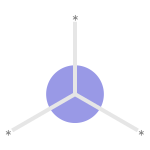

In [50]:
from rdkit.Chem.Draw import IPythonConsole
Draw.DrawMorganBit(drugbank[666], 507, bitinfo)